# Pandas Foundations

Noah Markowitz

April 2019

### Reviewing the basics of Pandas

Inspecting with methods: 
* `.head()` 
* `.tail()`
* `.info()`
* `.describe()`

Relevant details: 
* Pandas is aware of the data types in the columns of your DataFrame. It is also aware of null and NaN ('Not-a-Number') types which often indicate missing data.
* Runs off of numpy arrays




In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('world_ind_pop_data.csv')

# Basic functions
print(df.head(), end = '\n\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n\n')
print(df.tail(), end = '\n\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n\n')

                               CountryName CountryCode  Year  \
0                               Arab World         ARB  1960   
1                   Caribbean small states         CSS  1960   
2           Central Europe and the Baltics         CEB  1960   
3  East Asia & Pacific (all income levels)         EAS  1960   
4    East Asia & Pacific (developing only)         EAP  1960   

   Total Population  Urban population (% of total)  
0      9.249590e+07                      31.285384  
1      4.190810e+06                      31.597490  
2      9.140158e+07                      44.507921  
3      1.042475e+09                      22.471132  
4      8.964930e+08                      16.917679  

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

                 CountryName CountryCode  Year  Total Population  \
13369  Virgin Islands (U.S.)         VIR  2014          104170.0   
13370     West Bank and Gaza         WBG  2014         4294682.0   
13371            Yemen, Re

Use `.info()` to see how much and what kind of data there is

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13374 entries, 0 to 13373
Data columns (total 5 columns):
CountryName                      13374 non-null object
CountryCode                      13374 non-null object
Year                             13374 non-null int64
Total Population                 13374 non-null float64
Urban population (% of total)    13374 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 522.5+ KB
None


Using numpy methods on pandas dataframes

In [3]:
df = pd.read_csv('world_population.csv')

# Create array of DataFrame values: np_vals
np_vals = df.values

# Create new array of base 10 logarithm values: np_vals_log10
np_vals_log10 = np.log10(np_vals)

# Create array of new DataFrame by passing df to np.log10(): df_log10
df_log10 = np.log10(df)

# Print original and new data containers
[print(x, 'has type', type(eval(x))) for x in ['np_vals', 'np_vals_log10', 'df', 'df_log10']]

np_vals has type <class 'numpy.ndarray'>
np_vals_log10 has type <class 'numpy.ndarray'>
df has type <class 'pandas.core.frame.DataFrame'>
df_log10 has type <class 'pandas.core.frame.DataFrame'>


[None, None, None, None]

##### Creating DataFrames

Using functions such as:
* `pd.read_csv()`
* `pd.DataFrame()` using
    + lists
    + dictionaries
    + dictionaries of a zip object

Below, a zip object is converted into a list and then into a DataFrame

In [4]:
# Create lists for dataframe
list_keys = ['Country', 'Total']
list_values = [['United States', 'Soviet Union', 'United Kingdom'], [1118, 473, 273]]

# Zip the 2 lists together into one list of (key,value) tuples: zipped
zipped = list(zip(list_keys, list_values))

# Inspect the list using print()
print(zipped)

# Build a dictionary with the zipped list: data
data = dict(zipped)

# Build and inspect a DataFrame from the dictionary: df
df = pd.DataFrame(data)
print(df)

[('Country', ['United States', 'Soviet Union', 'United Kingdom']), ('Total', [1118, 473, 273])]
          Country  Total
0   United States   1118
1    Soviet Union    473
2  United Kingdom    273


If you didn't do it before, you can label your columns in a DataFrame

In [5]:
df = pd.DataFrame(data = {'a' : [1980, 1981, 1982], 'b' : ['Blondie', 'Christopher Cross', 'Joan Jett'], 
                          'c' : ['Call Me', 'Arthurs Theme', 'I Love Rock and Roll'], 'd' : [6,3,7]})

# Build a list of labels: list_labels
list_labels = ['year', 'artist', 'song', 'chart weeks']

# Assign the list of labels to the columns attribute: df.columns
df.columns = list_labels
print(df)

   year             artist                  song  chart weeks
0  1980            Blondie               Call Me            6
1  1981  Christopher Cross         Arthurs Theme            3
2  1982          Joan Jett  I Love Rock and Roll            7


You can also create DataFrames using 'broadcasting'

In [6]:
# Create list of cities
cities = ['Manheim','Preston park','Biglerville','Indiana','Curwensville','Crown','Harveys lake','Mineral springs',
 'Cassville','Hannastown','Saltsburg','Tunkhannock','Pittsburgh','Lemasters','Great bend']

# Make a string with the value 'PA': state
state = 'PA'

# Construct a dictionary: data
data = {'state': state, 'city': cities}

# Construct a DataFrame from dictionary data: df
df = pd.DataFrame(data = data)

# Print the DataFrame
print(df)

   state             city
0     PA          Manheim
1     PA     Preston park
2     PA      Biglerville
3     PA          Indiana
4     PA     Curwensville
5     PA            Crown
6     PA     Harveys lake
7     PA  Mineral springs
8     PA        Cassville
9     PA       Hannastown
10    PA        Saltsburg
11    PA      Tunkhannock
12    PA       Pittsburgh
13    PA        Lemasters
14    PA       Great bend


##### Importing and Exporting Data

First, reading in a file

Some arguments to use when reading in using `pd.read_csv()` are:
* `names` - What each column label is
* `header` - Reset columns labels if already existing

In [7]:
data_file = 'world_population.csv'

# Read in the file: df1
df1 = pd.read_csv(data_file)

# Create a list of the new column labels: new_labels
new_labels = ['year', 'population']

# Read in the file, specifying the header and names parameters: df2
df2 = pd.read_csv(data_file, header=0, names=new_labels)

# Print both the DataFrames
print(df1)
print(df2)

   Year  Total Population
0  1960      3.034971e+09
1  1970      3.684823e+09
2  1980      4.436590e+09
3  1990      5.282716e+09
4  2000      6.115974e+09
5  2010      6.924283e+09
   year    population
0  1960  3.034971e+09
1  1970  3.684823e+09
2  1980  4.436590e+09
3  1990  5.282716e+09
4  2000  6.115974e+09
5  2010  6.924283e+09


You can also import messy data. Files that are not nicely constructed like the one above. For the example below, the reasons the file is messy include:
* multiple header lines
* comment records (rows) interleaved throughout the data rows
* space delimiters instead of commas.

Arguments upon import you can use are:
* `delimiter` - specify how each cell or piece of data is separated
* `header` - Line number in the file that contains the header
* `comment` - How to identify what is a comment in the file and ignore it

In [8]:
file_messy = 'messy_stock_data.tsv'

# Read the raw file as-is: df1
df1 = pd.read_csv(file_messy)

# Print the output of df1.head()
print(df1.head(), end = '\n\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n\n')

# Read in the file with the correct parameters: df2
df2 = pd.read_csv(file_messy, delimiter=' ', header=3, comment='#')

# Print the output of df2.head()
print(df2.head())

                                                   The following stock data was collect on 2016-AUG-25 from an unknown source
These kind of ocmments are not very useful                                                  are they?                        
probably should just throw this line away too          but not the next since those are column labels                        
name Jan Feb Mar Apr May Jun Jul Aug Sep Oct No...                                                NaN                        
# So that line you just read has all the column...                                                NaN                        
IBM 156.08 160.01 159.81 165.22 172.25 167.15 1...                                                NaN                        

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

     name     Jan     Feb     Mar     Apr     May     Jun     Jul     Aug  \
0     IBM  156.08  160.01  159.81  165.22  172.25  167.15  164.75  152.77   
1    MSFT   45.51   43.

Then you can export the now cleaned up data to new files

In [9]:
file_clean = 'tmp_clean_stock_data.csv'

# Save the cleaned up DataFrame to a CSV file without the index
df2.to_csv(file_clean, index=False)

# Save the cleaned up DataFrame to an excel file without the index
df2.to_excel('file_clean.xlsx', index=False)

##### Plotting with Pandas

You can use matplotlib's method `.plot()` on a Pandas DataFrame

In [10]:
import matplotlib.pyplot as plt

# Import the DataFrame to be used in the next few exercises
df_all = pd.read_csv('weather_data_austin_2010.csv')

# Create dataframe for this round
df = pd.DataFrame(df_all['Temperature'][0:600])

# Create a plot with color='red'
df.plot(color = 'red')

# Add a title
plt.title('Temperature in Austin')

# Specify the x-axis label
plt.xlabel('Hours since midnight August 1, 2010')

# Specify the y-axis label
plt.ylabel('Temperature (degrees F)')

# Display the plot
plt.show()

<Figure size 640x480 with 1 Axes>

There's also ways to plot DataFrames with multiple columns

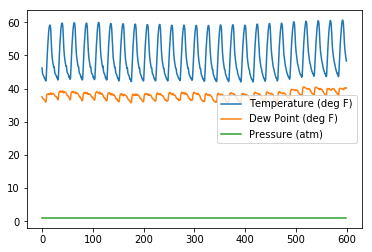

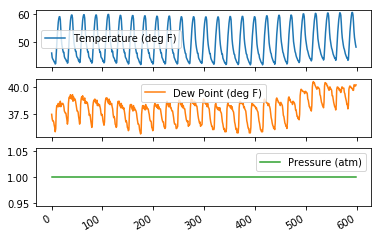

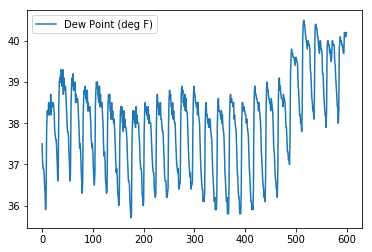

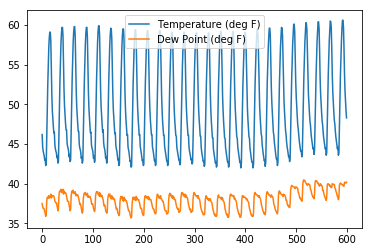

In [11]:
l = 600
df = pd.DataFrame({'Temperature (deg F)' : df_all['Temperature'][0:l], 
                   'Dew Point (deg F)' : df_all['DewPoint'][0:l], 'Pressure (atm)' : df_all['Pressure'][0:l]})

# Plot all columns (default)
df.plot()
plt.show()

# Plot all columns as subplots
df.plot(subplots = True)
plt.show()

# Plot just the Dew Point data
column_list1 = ['Dew Point (deg F)']
df[column_list1].plot()
plt.show()

# Plot the Dew Point and Temperature data, but not the Pressure data
column_list2 = ['Temperature (deg F)','Dew Point (deg F)']
df[column_list2].plot()
plt.show()

### EDA in Pandas

##### Visual EDA

Such as histograms, scatterplots, swarm plots etc.

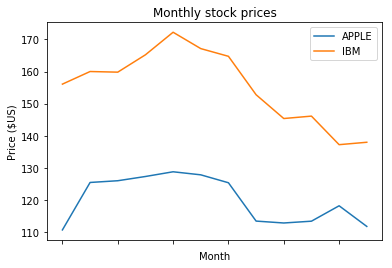

In [12]:
df = pd.read_csv('stock.csv')

# Create a list of y-axis column names: y_columns
y_columns = ['APPLE', 'IBM']

# Generate a line plot
df.plot(x='Month', y=y_columns)

# Add the title
plt.title('Monthly stock prices')

# Add the y-axis label
plt.ylabel('Price ($US)')

# Display the plot
plt.show()

We can specify a plot to be a scatterplot with dots of varying sizes

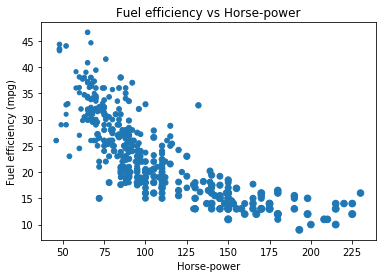

In [13]:
df = pd.read_csv('auto-mpg.csv')
sizes = np.array([df['weight']])/100

# Generate a scatter plot
df.plot(kind='scatter', x='hp', y='mpg', s=sizes)

# Add the title
plt.title('Fuel efficiency vs Horse-power')

# Add the x-axis label
plt.xlabel('Horse-power')

# Add the y-axis label
plt.ylabel('Fuel efficiency (mpg)')

# Display the plot
plt.show()

Now boxplots

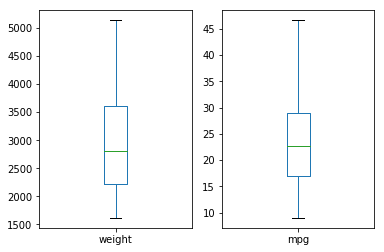

In [14]:
# Make a list of the column names to be plotted: cols
cols = ['weight', 'mpg']

# Generate the box plots
df[cols].plot(kind = 'box', subplots = True)

# Display the plot
plt.show()

Now for histograms, PDFs (probability density functions) and CDFs (cumulative density functions)
* For PDF
    + Need to specify `normed=True` in your call to `.hist()`, 
* CDF
    + Need to specify `cumulative=True` in addition to `normed=True`.

Down below:
* Plot a PDF 
    + For the values in fraction column with 30 bins between 0 and 30%.
    + `ax=axes[0]` means that this plot will appear in the first row.
* Plot a CDF 
    + For the values in fraction with 30 bins between 0 and 30%.
    + To make the CDF appear on the second row, you need to specify `ax=axes[1]`

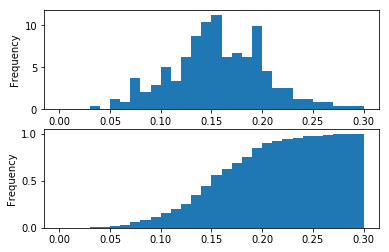

In [15]:
df = pd.read_csv('tips.csv')

# This formats the plots such that they appear on separate rows
fig, axes = plt.subplots(nrows=2, ncols=1)

# Plot the PDF
df.fraction.plot(ax=axes[0], kind='hist', bins=30, density=True, range=(0,.3))

# Plot the CDF
df.fraction.plot(ax=axes[1], kind='hist', bins=30, density=True, cumulative=True, range=(0,0.3))
plt.show()

##### Statistical EDA

0.8

~~~~~~~~~

19.0

~~~~~~~~~

Year
1970    38.594697
1971    38.603481
1972    39.066075
1973    40.131826
1974    41.715916
dtype: float64


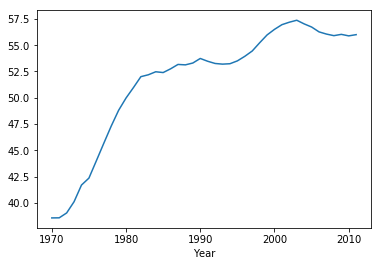

In [16]:
df = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
df = df.set_index('Year')

# Print the minimum value of the Engineering column
print(df.Engineering.min(), end = '\n\n~~~~~~~~~\n\n')

# Print the maximum value of the Engineering column
print(df.Engineering.max(), end = '\n\n~~~~~~~~~\n\n')

# Construct the mean percentage per year: mean
mean = df.mean(axis='columns')
print(mean.head())

# Plot the average percentage per year
mean.plot()

# Display the plot
plt.show()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64


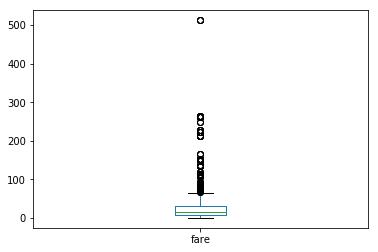

In [17]:
df = pd.read_csv('titanic.csv')

# Print summary statistics of the fare column with .describe()
print(df.fare.describe())

# Generate a box plot of the fare column
df.fare.plot(kind = 'box')

# Show the plot
plt.show()

In this exercise, you'll investigate the probabilities of life expectancy in countries around the world.

* Determine the number of countries reported in 2015. 
* There are a total of 260 unique countries in the entire dataset. 
* Then, you will compute the 5th and 95th percentiles of life expectancy over the entire dataset. 
* Finally, you will make a box plot of life expectancy every 50 years from 1800 to 2000. 

Notice the large change in the distributions over this period.

208
      Unnamed: 0   1800   1801   1802  1803  1804   1805   1806   1807  1808  \
0.05       12.95  25.40  25.30  25.20  25.2  25.2  25.40  25.40  25.40  25.3   
0.95      246.05  37.92  37.35  38.37  38.0  38.3  38.37  38.37  38.37  38.0   

       ...      2007   2008    2009    2010   2011    2012    2013   2014  \
0.05   ...     53.07  53.60  54.235  54.935  55.97  56.335  56.705  56.87   
0.95   ...     80.73  80.93  81.200  81.365  81.60  81.665  81.830  82.00   

        2015     2016  
0.05  57.855  59.2555  
0.95  82.100  82.1650  

[2 rows x 218 columns]


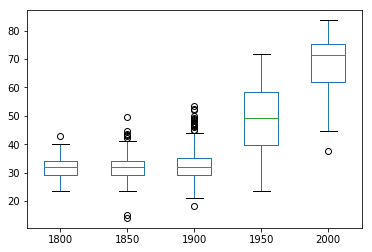

In [18]:
df = pd.read_csv('life_expectancy_at_birth.csv')

# Print the number of countries reported in 2015
print(df['2015'].count())

# Print the 5th and 95th percentiles
print(df.quantile([0.05, 0.95]))

# Generate a box plot
years = ['1800','1850','1900','1950','2000']
df[years].plot(kind='box')
plt.show()

##### Filtering with Boolean Indexing

Simple example below. Find out how many cars were built in Asia

In [19]:
df = pd.read_csv('auto-mpg.csv')
print( df[df['origin'] == 'Asia'].count() , end = '\n~~~~~~~~~~~\n')

# Or can simplify it to:
print( df[df['origin'] == 'Asia']['origin'].count() )

mpg       79
cyl       79
displ     79
hp        79
weight    79
accel     79
yr        79
origin    79
name      79
dtype: int64
~~~~~~~~~~~
79


Let's use population filtering to determine how the automobiles in the US differ from the global average and standard deviation. How does the distribution of fuel efficiency (MPG) for the US differ from the global average and standard deviation?

In [20]:
# Compute the global mean and global standard deviation: global_mean, global_std
global_mean = df.mean()
global_std = df.std()

# Filter the US population from the origin column: us
us = df[df['origin'] == 'US']

# Compute the US mean and US standard deviation: us_mean, us_std
us_mean = us.mean()
us_std = us.std()

# Print the differences
print(us_mean - global_mean, end = '\n~~~~~~~~~~~~~~~~~~~~~~\n')
print(us_std - global_std)

mpg        -3.412449
cyl         0.805612
displ      53.100255
hp         14.579592
weight    394.905612
accel      -0.551122
yr         -0.387755
dtype: float64
~~~~~~~~~~~~~~~~~~~~~~
mpg       -1.364623
cyl       -0.049788
displ     -6.267657
hp         1.406630
weight   -54.055870
accel     -0.022844
yr        -0.023369
dtype: float64


Population filtering can be used alongside plotting to quickly determine differences in distributions between the sub-populations. You'll work with the Titanic dataset.

You can also filter using `.loc()` method

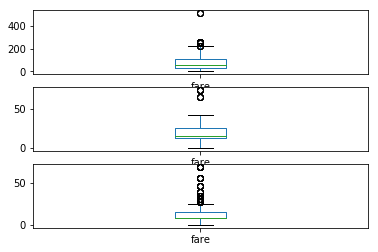

In [21]:
titanic = pd.read_csv('titanic.csv')

# Display the box plots on 3 separate rows and 1 column
fig, axes = plt.subplots(nrows=3, ncols=1)

# Generate a box plot of the fare prices for the First passenger class
titanic.loc[titanic['pclass'] == 1].plot(ax=axes[0], y='fare', kind='box')

# Generate a box plot of the fare prices for the Second passenger class
titanic.loc[titanic['pclass'] == 2].plot(ax=axes[1], y='fare', kind='box')

# Generate a box plot of the fare prices for the Third passenger class
titanic.loc[titanic['pclass'] == 3].plot(ax=axes[2], y='fare', kind='box')

# Display the plot
plt.show()

### Pandas and Time Series

You can read in formatted date and time strings in a dataframe using `parse_dates = True` argument

Ex: `df = pd.read_csv(filename, index_col='Date', parse_dates=True)`

The argument `index_col` specifies what column should act as the index for the dataframe

In [22]:
df = pd.read_csv('weather_data_austin_2010.csv', index_col='Date', parse_dates=True)

# Locate specific date in the DataFrame
print( df.loc['2010-Aug-01'] )

                     Temperature  DewPoint  Pressure
Date                                                
2010-08-01 00:00:00         79.0      70.8       1.0
2010-08-01 01:00:00         77.4      71.2       1.0
2010-08-01 02:00:00         76.4      71.3       1.0
2010-08-01 03:00:00         75.7      71.4       1.0
2010-08-01 04:00:00         75.1      71.4       1.0
2010-08-01 05:00:00         74.6      71.3       1.0
2010-08-01 06:00:00         74.5      71.3       1.0
2010-08-01 07:00:00         76.0      72.3       1.0
2010-08-01 08:00:00         79.8      72.8       1.0
2010-08-01 09:00:00         83.3      72.1       1.0
2010-08-01 10:00:00         86.6      71.1       1.0
2010-08-01 11:00:00         89.3      70.2       1.0
2010-08-01 12:00:00         91.6      69.1       1.0
2010-08-01 13:00:00         93.2      68.4       1.0
2010-08-01 14:00:00         94.4      67.6       1.0
2010-08-01 15:00:00         95.0      67.1       1.0
2010-08-01 16:00:00         94.8      66.8    

You can also convert a list of dates and times using `pd.to_datetimes()` if you provide and datetime format for it to use

In [23]:
date_list = df.index.tolist()
temperature_list = df['Temperature'].tolist()

# Prepare a format string: time_format
time_format = '%Y-%m-%d %H:%M'

# Convert date_list into a datetime object: my_datetimes
my_datetimes = pd.to_datetime(date_list, format=time_format)  
print(my_datetimes, end = '\n\n' + '~'*80 + '\n\n')

# Construct a pandas Series using temperature_list and my_datetimes: time_series
time_series = pd.Series(temperature_list, index=my_datetimes)
print(time_series.head() )

DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 01:00:00',
               '2010-01-01 02:00:00', '2010-01-01 03:00:00',
               '2010-01-01 04:00:00', '2010-01-01 05:00:00',
               '2010-01-01 06:00:00', '2010-01-01 07:00:00',
               '2010-01-01 08:00:00', '2010-01-01 09:00:00',
               ...
               '2010-12-31 14:00:00', '2010-12-31 15:00:00',
               '2010-12-31 16:00:00', '2010-12-31 17:00:00',
               '2010-12-31 18:00:00', '2010-12-31 19:00:00',
               '2010-12-31 20:00:00', '2010-12-31 21:00:00',
               '2010-12-31 22:00:00', '2010-12-31 23:00:00'],
              dtype='datetime64[ns]', length=8759, freq=None)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

2010-01-01 00:00:00    46.2
2010-01-01 01:00:00    44.6
2010-01-01 02:00:00    44.1
2010-01-01 03:00:00    43.8
2010-01-01 04:00:00    43.5
dtype: float64


Partial string indexing and slicing

Pandas time series support "partial string" indexing. What this means is that even when passed only a portion of the datetime, such as the date but not the time, pandas is remarkably good at doing what one would expect. Pandas datetime indexing also supports a wide variety of commonly used datetime string formats, even when mixed.

In [24]:
ts0 = time_series

# Extract the hour from 9pm to 10pm on '2010-10-11': ts1
ts1 = ts0.loc['2010-10-11 21:00:00':'2010-10-11 22:00:00']
print(ts1, end = '\n\n' + '~'*40 + '\n\n')

# Extract '2010-07-04' from ts0: ts2
ts2 = ts0.loc['2010-07-04']
print(ts2.head(), end = '\n\n' + '~'*40 + '\n\n')

# Extract data from '2010-12-15' to '2010-12-31': ts3
ts3 = ts0.loc['2010-12-15':'2010-12-31']
print(ts3.head(), end = '\n\n' + '~'*40 + '\n\n')

2010-10-11 21:00:00    69.0
2010-10-11 22:00:00    67.7
dtype: float64

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

2010-07-04 00:00:00    77.6
2010-07-04 01:00:00    76.3
2010-07-04 02:00:00    75.5
2010-07-04 03:00:00    74.9
2010-07-04 04:00:00    74.6
dtype: float64

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

2010-12-15 00:00:00    48.0
2010-12-15 01:00:00    47.2
2010-12-15 02:00:00    46.5
2010-12-15 03:00:00    46.0
2010-12-15 04:00:00    45.6
dtype: float64

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



Reindexing the Index

Reindexing is useful in preparation for adding or otherwise combining two time series data sets. To reindex the data, we provide a new index and ask pandas to try and match the old data to the new index. If data is unavailable for one of the new index dates or times, you must tell pandas how to fill it in. Otherwise, pandas will fill with NaN by default.

In [25]:
ts1_tmp = ['2016-07-' + str(x).zfill(2) for x in range(1,18)]
ts2_tmp = ['2016-07-01'] + ['2016-07-' + str(x).zfill(2) for x in range(4,9)] + ['2016-07-' + str(x).zfill(2) for x in range(11,16)]
ts1 = pd.Series( range(len(ts1_tmp)), index = pd.to_datetime(ts1_tmp, format = '%Y-%m-%d'))
ts2 = pd.Series( range(len(ts2_tmp)), index = pd.to_datetime(ts2_tmp, format = '%Y-%m-%d'))

# Reindex without fill method: ts3
ts3 = ts2.reindex(ts1.index)
print('Reindex without ffill method')
print(ts3, end = '\n\n' + '~'*40 + '\n\n')

# Reindex with fill method, using forward fill: ts4
ts4 = ts2.reindex(ts1.index, method = 'ffill')
print('Reindex with ffill method')
print(ts4, end = '\n\n' + '~'*40 + '\n\n')

# Combine ts1 + ts2: sum12
sum12 = ts1 + ts2
print('Add two datetime series')
print(sum12.head(), end = '\n\n' + '~'*40 + '\n\n')

# Combine ts1 + ts3: sum13
sum13 = ts1 + ts3
print('Add two datetime series')
print(sum13.head(), end = '\n\n' + '~'*40 + '\n\n')

# Combine ts1 + ts4: sum14
sum14 = ts1 + ts4
print('Add two datetime series')
print(sum14, end = '\n\n' + '~'*40 + '\n\n')

Reindex without ffill method
2016-07-01     0.0
2016-07-02     NaN
2016-07-03     NaN
2016-07-04     1.0
2016-07-05     2.0
2016-07-06     3.0
2016-07-07     4.0
2016-07-08     5.0
2016-07-09     NaN
2016-07-10     NaN
2016-07-11     6.0
2016-07-12     7.0
2016-07-13     8.0
2016-07-14     9.0
2016-07-15    10.0
2016-07-16     NaN
2016-07-17     NaN
dtype: float64

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Reindex with ffill method
2016-07-01     0
2016-07-02     0
2016-07-03     0
2016-07-04     1
2016-07-05     2
2016-07-06     3
2016-07-07     4
2016-07-08     5
2016-07-09     5
2016-07-10     5
2016-07-11     6
2016-07-12     7
2016-07-13     8
2016-07-14     9
2016-07-15    10
2016-07-16    10
2016-07-17    10
dtype: int64

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Add two datetime series
2016-07-01    0.0
2016-07-02    NaN
2016-07-03    NaN
2016-07-04    4.0
2016-07-05    6.0
dtype: float64

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Add two datetime series
2016-07-01    0.0
2016-

##### Resampling Time-Series Data

Pandas provides methods for resampling time series data. When downsampling or upsampling, the syntax is similar, but the methods called are different


Resampling 
* Computing statistical methods (such as `.mean()`, `.median()`, `.count()` etc.) over different time intervals 
* Downsampling
    + Reindexing time-series data to reduce frequency (such as measuring by weeks rather than days)
* Upsampling
    + Reindexing time-series data to increase frequency (such as hours to minutes)

In [26]:
df = pd.read_csv('weather_data_austin_2010.csv', index_col='Date', parse_dates=True)

# Downsample to 6 hour data and aggregate by mean: df1
df1 = df['Temperature'].resample('6h').mean()
print(df1.head(), end = '\n\nAbove is the temperature mean of every 6 hours' + '\n' + '~'*40 + '\n')

# Downsample to daily data and count the number of data points: df2
df2 = df['Temperature'].resample('D').count()
print(df2.head(), end = '\n\nAbove is the number of samples taken for each day' + '\n' + '~'*40)

Date
2010-01-01 00:00:00    44.200000
2010-01-01 06:00:00    45.933333
2010-01-01 12:00:00    57.766667
2010-01-01 18:00:00    49.450000
2010-01-02 00:00:00    44.516667
Freq: 6H, Name: Temperature, dtype: float64

Above is the temperature mean of every 6 hours
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Date
2010-01-01    24
2010-01-02    24
2010-01-03    24
2010-01-04    24
2010-01-05    24
Freq: D, Name: Temperature, dtype: int64

Above is the number of samples taken for each day
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

With pandas, you can resample in different ways on different subsets of your data. For example, resampling different months of data with different aggregations

In [27]:
# Extract temperature data for August: august
august = df.loc['2010-08-01' : '2010-08-31', 'Temperature']

# Downsample to obtain only the daily highest temperatures in August: august_highs
august_highs = august.resample('D').max()
print(august_highs.head(), end = '\n\n' + '~'*40 + '\n\n')

# Extract temperature data for February: february
february = df.loc['2010-02-01' : '2010-02-28', 'Temperature']

# Downsample to obtain the daily lowest temperatures in February: february_lows
february_lows = february.resample('D').min()
print(february_lows.head())

Date
2010-08-01    95.0
2010-08-02    95.0
2010-08-03    95.1
2010-08-04    95.1
2010-08-05    95.1
Freq: D, Name: Temperature, dtype: float64

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Date
2010-02-01    43.8
2010-02-02    44.3
2010-02-03    44.6
2010-02-04    44.5
2010-02-05    44.3
Freq: D, Name: Temperature, dtype: float64


###### Rolling mean and frequency

Rolling means (or moving averages)
* Generally used to smooth out short-term fluctuations in time series data 
* Also highlight long-term trends.
* Uses the `.rolling()` method

For example, with a Series `hourly_data`
* `hourly_data.rolling(window=24).mean()` would compute new values for each hourly point, based on a 24-hour window stretching out **behind** each point. 
* The frequency of the output data is the same: it is still hourly. 
* Such an operation is useful for smoothing time series data.

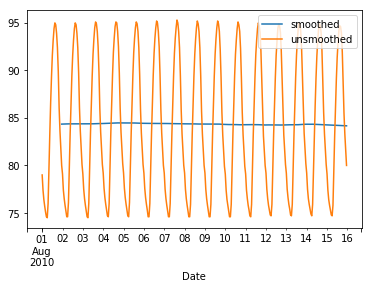

In [28]:
df = pd.read_csv('weather_data_austin_2010.csv', index_col='Date', parse_dates=True)

# Extract data from 2010-Aug-01 to 2010-Aug-15: unsmoothed
unsmoothed = df['Temperature']['2010-08-01':'2010-08-15']

# Apply a rolling mean with a 24 hour window: smoothed
smoothed = unsmoothed.rolling(window = 24).mean()

# Create a new DataFrame with columns smoothed and unsmoothed: august
august = pd.DataFrame({'smoothed':smoothed, 'unsmoothed':unsmoothed})

# Plot both smoothed and unsmoothed data using august.plot().
august.plot()
plt.show()

In [29]:
# Extract the August 2010 data: august
august = df['Temperature']['2010-August']

# Resample to daily data, aggregating by max: daily_highs
daily_highs = august.resample('D').max()

# Use a rolling 7-day window with method chaining to smooth the daily high temperatures in August
daily_highs_smoothed = daily_highs.rolling(window=7).mean()
print(daily_highs_smoothed)

Date
2010-08-01          NaN
2010-08-02          NaN
2010-08-03          NaN
2010-08-04          NaN
2010-08-05          NaN
2010-08-06          NaN
2010-08-07    95.114286
2010-08-08    95.142857
2010-08-09    95.171429
2010-08-10    95.171429
2010-08-11    95.157143
2010-08-12    95.128571
2010-08-13    95.100000
2010-08-14    95.042857
2010-08-15    94.971429
2010-08-16    94.900000
2010-08-17    94.857143
2010-08-18    94.828571
2010-08-19    94.814286
2010-08-20    94.785714
2010-08-21    94.757143
2010-08-22    94.742857
2010-08-23    94.714286
2010-08-24    94.642857
2010-08-25    94.542857
2010-08-26    94.428571
2010-08-27    94.271429
2010-08-28    94.100000
2010-08-29    93.914286
2010-08-30    93.742857
2010-08-31    93.571429
Freq: D, Name: Temperature, dtype: float64


**Manipulating Time-Series**

Using method chaining

In [30]:
df = pd.read_csv('austin_airport_departure_data_2015_july.csv', header = 10, 
                 index_col = 'Date (MM/DD/YYYY)', parse_dates = True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1741 entries, 2015-07-01 to NaT
Data columns (total 17 columns):
  Carrier Code                            1741 non-null object
Flight Number                             1740 non-null float64
Tail Number                               1740 non-null object
Destination Airport                       1740 non-null object
Scheduled Departure Time                  1740 non-null object
Actual Departure Time                     1740 non-null object
Scheduled Elapsed Time(Minutes)           1740 non-null float64
Actual Elapsed Time(Minutes)              1740 non-null float64
Departure Delay(Minutes)                  1740 non-null float64
Wheels-off Time                           1740 non-null object
Taxi-out Time(Minutes)                    1740 non-null float64
DelayCarrier(Minutes)                     1740 non-null float64
DelayWeather(Minutes)                     1740 non-null float64
DelayNational Aviation System(Minutes)    1740 non-null 

In [31]:
# Strip extra whitespace from the column names: df.columns
df.columns = df.columns.str.strip()

# Extract data for which the destination airport is Dallas: dallas
dallas = df['Destination Airport'].str.contains('DAL')

# Compute the total number of Dallas departures each day: daily_departures
daily_departures = dallas.resample('D').sum()

# Generate the summary statistics for daily Dallas departures: stats
stats = daily_departures.describe()
print(stats)

count    31.000000
mean      9.322581
std       1.989759
min       3.000000
25%       9.500000
50%      10.000000
75%      10.000000
max      11.000000
dtype: float64


**Missing values and interpolation**

One common application of interpolation in data analysis is to fill in missing data.

In this exercise, noisy measured data that has some dropped or otherwise missing values has been loaded. The goal is to compare two time series, and then look at summary statistics of the differences. The problem is that one of the data sets is missing data at some of the times. 

In [32]:
# Set up the data to work with
ts1_tmp = ['2016-07-' + str(x).zfill(2) for x in range(1,18)]
ts2_tmp = ['2016-07-' + str(x).zfill(2) for x in [1,4,5,6,7,8,11,12,13,14,15] ]
ts1 = pd.Series( range(len(ts1_tmp)), index = pd.to_datetime(ts1_tmp, format = '%Y-%m-%d'))
ts2 = pd.Series( range(len(ts2_tmp)), index = pd.to_datetime(ts2_tmp, format = '%Y-%m-%d'))

# Reset the index of ts2 to ts1, and then use linear interpolation to fill in the NaNs: ts2_interp
ts2_interp = ts2.reindex(ts1.index).interpolate(how='linear')

# Compute the absolute difference of ts1 and ts2_interp: differences 
differences = np.abs(ts2_interp - ts1)

# Generate and print summary statistics of the differences
print(differences.describe())

count    17.000000
mean      2.882353
std       1.585267
min       0.000000
25%       2.000000
50%       2.666667
75%       4.000000
max       6.000000
dtype: float64


In [33]:
df = pd.read_csv('austin_airport_departure_data_2015_july.csv', header = 10)

# Build a Boolean mask to filter out all the 'LAX' departure flights: mask
mask = df['Destination Airport '] == 'LAX'

# Use the mask to subset the data: la
la = df[mask]

# Combine two columns of data to create a datetime series: times_tz_none 
times_tz_none = pd.to_datetime( la['Date (MM/DD/YYYY)'] + ' ' + la['Wheels-off Time'] )

# Localize the time to US/Central: times_tz_central
times_tz_central = times_tz_none.dt.tz_localize('US/Central')
print( times_tz_central.head() , end = '\n' + '~'*40 + '\n')

# Convert the datetimes from US/Central to US/Pacific
times_tz_pacific = times_tz_central.dt.tz_convert('US/Pacific')
print( times_tz_pacific.head() )

33    2015-07-01 05:43:00-05:00
55    2015-07-01 16:27:00-05:00
91    2015-07-02 05:47:00-05:00
113   2015-07-02 16:23:00-05:00
134   2015-07-03 05:30:00-05:00
dtype: datetime64[ns, US/Central]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
33    2015-07-01 03:43:00-07:00
55    2015-07-01 14:27:00-07:00
91    2015-07-02 03:47:00-07:00
113   2015-07-02 14:23:00-07:00
134   2015-07-03 03:30:00-07:00
dtype: datetime64[ns, US/Pacific]


##### Visualizing Time-Series Data

Pandas handles datetimes not only in your data, but also in your plotting.

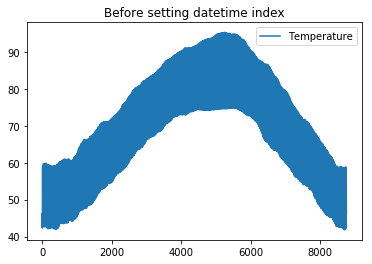

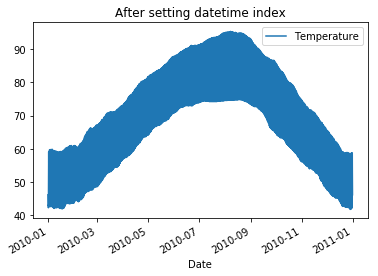

In [34]:
df = pd.read_csv('weather_data_austin_2010.csv', usecols = ['Temperature', 'Date'])
# Plot the raw data before setting the datetime index
df.plot(title = 'Before setting datetime index')
plt.show()

# Convert the 'Date' column into a collection of datetime objects: df.Date
df.Date = pd.to_datetime(df['Date'])

# Set the index to be the converted 'Date' column
df.set_index('Date',inplace = True)

# Re-plot the DataFrame to see that the axis is now datetime aware!
df.plot(title = 'After setting datetime index')
plt.show()

Plotting date ranges, partial indexing

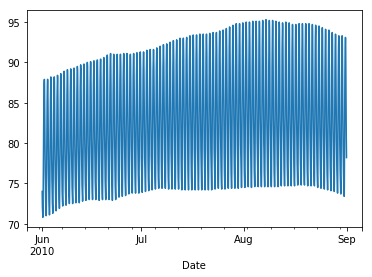

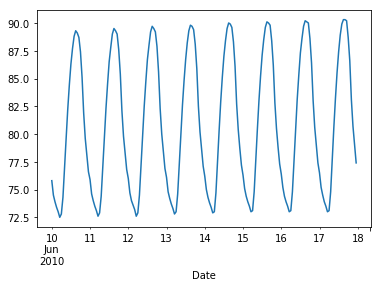

In [35]:
df = pd.read_csv('weather_data_austin_2010.csv', index_col = 'Date', parse_dates = True)

df.Temperature['2010-Jun':'2010-Aug'].plot()
plt.show()
#plt.clf()

# Plot the one week data
df.Temperature['2010-06-10':'2010-06-17'].plot()
plt.show()
#plt.clf()

### Case Study

Using weather data

In [36]:
# Import pandas
import pandas as pd

data_file = 'NOAA_QCLCD_2011_hourly_13904.txt'

# Read in the data file: df
df = pd.read_csv(data_file)

# Print the output of df.head()
print(df.head(), end = '\n\n' + '*'*40 + '\n\n')

# Read in the data file with header=None: df_headers
df_headers = pd.read_csv(data_file, header=None)

# Print the output of df_headers.head()
print(df_headers.head())

   13904  20110101  0053  12  OVC045     10.00  .1  .2  .3 ...   .18  .19  \
0  13904  20110101   153  12  OVC049     10.00             ...              
1  13904  20110101   253  12  OVC060     10.00             ...   030        
2  13904  20110101   353  12  OVC065     10.00             ...              
3  13904  20110101   453  12  BKN070     10.00             ...              
4  13904  20110101   553  12  BKN065     10.00             ...   015        

   29.95  .20  AA  .21  .22  .23 29.95.1  .24  
0  30.01       AA                  30.02       
1  30.01       AA                  30.02       
2  30.03       AA                  30.04       
3  30.04       AA                  30.04       
4  30.06       AA                  30.06       

[5 rows x 44 columns]

****************************************

      0         1    2   3       4  5      6  7  8  9  ...   34 35     36 37  \
0  13904  20110101   53  12  OVC045     10.00          ...          29.95      
1  13904  20110101  153

##### Time to clean the data

In [37]:
# Column labels
column_labels = ("Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,"
"visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,"
"dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,"
"dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,"
"relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,"
"value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,"
"pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,"
"record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk")

# List of columns to drop
list_to_drop = ['sky_conditionFlag','visibilityFlag','wx_and_obst_to_vision','wx_and_obst_to_visionFlag',
 'dry_bulb_farenFlag','dry_bulb_celFlag','wet_bulb_farenFlag','wet_bulb_celFlag','dew_point_farenFlag',
 'dew_point_celFlag','relative_humidityFlag','wind_speedFlag','wind_directionFlag','value_for_wind_character',
 'value_for_wind_characterFlag','station_pressureFlag','pressure_tendencyFlag','pressure_tendency','presschange',
 'presschangeFlag','sea_level_pressureFlag','hourly_precip','hourly_precipFlag','altimeter','record_type',
 'altimeterFlag','junk']

# Split on the comma to create a list: column_labels_list
column_labels_list = column_labels.split(',')

# Assign the new column labels to the DataFrame: df.columns
df.columns = column_labels_list

# Remove the appropriate columns: df_dropped
df_dropped = df.drop(list_to_drop,axis = 'columns')

# Print the output of df_dropped.head()
print(df_dropped.head())

    Wban      date  Time  StationType sky_condition visibility dry_bulb_faren  \
0  13904  20110101   153           12        OVC049      10.00             51   
1  13904  20110101   253           12        OVC060      10.00             51   
2  13904  20110101   353           12        OVC065      10.00             50   
3  13904  20110101   453           12        BKN070      10.00             50   
4  13904  20110101   553           12        BKN065      10.00             49   

  dry_bulb_cel wet_bulb_faren wet_bulb_cel dew_point_faren dew_point_cel  \
0         10.6             37          3.0              14         -10.0   
1         10.6             37          2.9              13         -10.6   
2         10.0             38          3.1              17          -8.3   
3         10.0             37          2.8              15          -9.4   
4          9.4             37          2.8              17          -8.3   

  relative_humidity wind_speed wind_direction station_pr

**Cleaning DateTime data**

In [38]:
# Convert the date column to string: df_dropped['date']
df_dropped['date'] = df_dropped['date'].astype(str)

# Pad leading zeros to the Time column: df_dropped['Time']
df_dropped['Time'] = df_dropped['Time'].apply(lambda x:'{:0>4}'.format(x))

# Concatenate the new date and Time columns: date_string
date_string = df_dropped['date'] + df_dropped['Time']

# Convert the date_string Series to datetime: date_times
date_times = pd.to_datetime(date_string, format='%Y%m%d%H%M')

# Set the index to be the new date_times container: df_clean
df_clean = df_dropped.set_index(date_times)

# Print the output of df_clean.head()
print(df_clean.head())

                      Wban      date  Time  StationType sky_condition  \
2011-01-01 01:53:00  13904  20110101  0153           12        OVC049   
2011-01-01 02:53:00  13904  20110101  0253           12        OVC060   
2011-01-01 03:53:00  13904  20110101  0353           12        OVC065   
2011-01-01 04:53:00  13904  20110101  0453           12        BKN070   
2011-01-01 05:53:00  13904  20110101  0553           12        BKN065   

                    visibility dry_bulb_faren dry_bulb_cel wet_bulb_faren  \
2011-01-01 01:53:00      10.00             51         10.6             37   
2011-01-01 02:53:00      10.00             51         10.6             37   
2011-01-01 03:53:00      10.00             50         10.0             38   
2011-01-01 04:53:00      10.00             50         10.0             37   
2011-01-01 05:53:00      10.00             49          9.4             37   

                    wet_bulb_cel dew_point_faren dew_point_cel  \
2011-01-01 01:53:00          3.0

**Cleaning Numeric Data**

The numeric columns contain missing values labeled as `'M'`. In this exercise, your job is to transform these columns such that they contain only numeric values and interpret missing data as `NaN`.

The pandas function `pd.to_numeric()` is ideal for this purpose: It converts a Series of values to floating-point values. Furthermore, by specifying the keyword argument `errors='coerce'`, you can force strings like `'M'` to be interpreted as `NaN`

In [39]:
# Print the dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(df_clean.loc['2011-01-01 08:00:00':'2011-01-01 09:00:00', 'dry_bulb_faren'])

# Convert the dry_bulb_faren column to numeric values: df_clean['dry_bulb_faren']
df_clean['dry_bulb_faren'] = pd.to_numeric(df_clean['dry_bulb_faren'], errors='coerce')

# Print the transformed dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(df_clean.loc['2011-01-01 08:00:00':'2011-01-01 09:00:00', 'dry_bulb_faren'])

# Convert the wind_speed and dew_point_faren columns to numeric values
df_clean['wind_speed'] = pd.to_numeric(df_clean['wind_speed'], errors='coerce')
df_clean['dew_point_faren'] = pd.to_numeric(df_clean['dew_point_faren'], errors='coerce')

2011-01-01 08:53:00    51
Name: dry_bulb_faren, dtype: object
2011-01-01 08:53:00    51.0
Name: dry_bulb_faren, dtype: float64


### Statistical Exploratory EDA

In [40]:
# Print the median of the dry_bulb_faren column
print(df_clean['dry_bulb_faren'].median())

# Print the median of the dry_bulb_faren column for the time range '2011-Apr':'2011-Jun'
print(df_clean.loc['2011-Apr':'2011-Jun', 'dry_bulb_faren'].median())

# Print the median of the dry_bulb_faren column for the month of January
print(df_clean.loc['2011-Jan', 'dry_bulb_faren'].median())

72.0
78.0
48.0


You're now ready to compare the 2011 weather data with the 30-year normals reported in 2010. You can ask questions such as, on average, how much hotter was every day in 2011 than expected from the 30-year average?

The DataFrames df_clean and df_climate from previous exercises are available in the workspace.

Your job is to first resample df_clean and df_climate by day and aggregate the mean temperatures. You will then extract the temperature related columns from each - 'dry_bulb_faren' in df_clean, and 'Temperature' in df_climate - as NumPy arrays and compute the difference.

Notice that the indexes of df_clean and df_climate are not aligned - df_clean has dates in 2011, while df_climate has dates in 2010. This is why you extract the temperature columns as NumPy arrays. An alternative approach is to use the pandas .reset_index() method to make sure the Series align properly. You will practice this approach as well.

In [41]:
df_climate = pd.read_csv('weather_data_austin_2010.csv', index_col='Date', parse_dates=True)

# Downsample df_clean by day and aggregate by mean: daily_mean_2011
daily_mean_2011 = df_clean.resample('24h').mean()

# Extract the dry_bulb_faren column from daily_mean_2011 using .values: daily_temp_2011
daily_temp_2011 = daily_mean_2011['dry_bulb_faren'].values

# Downsample df_climate by day and aggregate by mean: daily_climate
daily_climate = df_climate.resample('24h').mean()

# Extract the Temperature column from daily_climate using .reset_index(): daily_temp_climate
daily_temp_climate = daily_climate.reset_index()['Temperature']

# Compute the difference between the two arrays and print the mean difference
difference = daily_temp_2011 - daily_temp_climate
print(difference.mean())

1.330083921569873


On average, how much hotter is it when the sun is shining? In this exercise, you will compare temperatures on sunny days against temperatures on overcast days.

In [42]:
# Using df_clean, when is sky_condition 'CLR'?
is_sky_clear = df_clean['sky_condition']=='CLR'

# Filter df_clean using is_sky_clear
sunny = df_clean.loc[is_sky_clear]

# Resample sunny by day then calculate the max
sunny_daily_max = sunny.resample('D').max()

# See the result
sunny_daily_max.head()

,Wban,date,Time,StationType,sky_condition,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01,13904.0,20110101,2353,12.0,CLR,59.0,8.3,45,7.2,28.0,-6.1,53,16.0,360,29.78,30.33
2011-01-02,13904.0,20110102,2253,12.0,CLR,35.0,1.7,32,0.1,28.0,-7.2,76,8.0,360,29.82,30.38
2011-01-03,13904.0,20110103,0453,12.0,CLR,32.0,0.0,29,-1.9,26.0,-4.4,85,0.0,000,29.71,30.27
2011-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05,13904.0,20110105,2353,12.0,CLR,35.0,1.7,33,0.3,29.0,-1.7,79,0.0,000,29.54,30.08


In [43]:
# Using df_clean, when does sky_condition contain 'OVC'?
is_sky_overcast = df_clean['sky_condition'].str.contains('OVC')

# Filter df_clean using is_sky_overcast
overcast = df_clean.loc[is_sky_overcast]

# Resample overcast by day then calculate the max
overcast_daily_max = overcast.resample('D').max()

# See the result
overcast_daily_max.head()

,Wban,date,Time,StationType,sky_condition,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01,13904.0,20110101,0353,12.0,OVC065,51.0,10.6,38,3.1,17.0,-8.3,27,15.0,350,29.51,30.03
2011-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03,13904.0,20110103,2353,12.0,SCT042 OVC055,58.0,9.4,49,9.7,45.0,7.0,79,10.0,200,29.70,M
2011-01-04,13904.0,20110104,2353,12.0,SCT010 OVC016,57.0,8.9,56,9.4,56.0,8.9,100,8.0,VR,29.59,M
2011-01-05,13904.0,20110105,0653,12.0,SCT006 OVC011,57.0,14.0,56,13.5,56.0,13.3,96,3.0,250,29.48,M


The above steps and the outcome can be joined together like so

In [44]:
# From previous steps
is_sky_clear = df_clean['sky_condition']=='CLR'
sunny = df_clean.loc[is_sky_clear]
sunny_daily_max = sunny.resample('D').max()
is_sky_overcast = df_clean['sky_condition'].str.contains('OVC')
overcast = df_clean.loc[is_sky_overcast]
overcast_daily_max = overcast.resample('D').max()

# Calculate the mean of sunny_daily_max
sunny_daily_max_mean = sunny_daily_max.mean()

# Calculate the mean of overcast_daily_max
overcast_daily_max_mean = overcast_daily_max.mean()

# Print the difference (sunny minus overcast)
print(sunny_daily_max_mean - overcast_daily_max_mean)

Wban               0.000000
StationType        0.000000
dry_bulb_faren     6.504304
dew_point_faren   -4.339286
wind_speed        -3.246062
dtype: float64


##### Visual EDA

Is there a correlation between temperature and visibility? Let's find out.

In this exercise, your job is to plot the weekly average temperature and visibility as subplots. To do this, you need to first select the appropriate columns and then resample by week, aggregating the mean.

In addition to creating the subplots, you will compute the Pearson correlation coefficient using `.corr()`. The Pearson correlation coefficient, known also as Pearson's r, ranges from -1 (indicating total negative linear correlation) to 1 (indicating total positive linear correlation). A value close to 1 here would indicate that there is a strong correlation between temperature and visibility.

                dry_bulb_faren
dry_bulb_faren             1.0


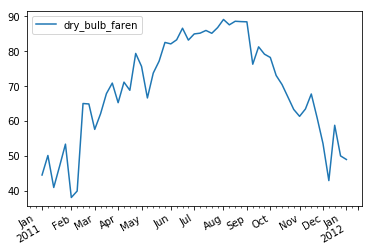

In [45]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Select the visibility and dry_bulb_faren columns and resample them: weekly_mean
weekly_mean = df_clean[['visibility','dry_bulb_faren']].resample('W').mean()

# Print the output of weekly_mean.corr()
print(weekly_mean.corr())

# Plot weekly_mean with subplots=True
weekly_mean.plot(subplots=True)
plt.show()

Daily hours of clear sky

In a previous exercise, you analyzed the 'sky_condition' column to explore the difference in temperature on sunny days compared to overcast days. Recall that a 'sky_condition' of 'CLR' represents a sunny day. In this exercise, you will explore sunny days in greater detail. Specifically, you will use a box plot to visualize the fraction of days that are sunny.

The 'sky_condition' column is recorded hourly. Your job is to resample this column appropriately such that you can extract the number of sunny hours in a day and the number of total hours. Then, you can divide the number of sunny hours by the number of total hours, and generate a box plot of the resulting fraction.

In [47]:
# Using df_clean, when is sky_condition 'CLR'?
is_sky_clear = df_clean['sky_condition'] == 'CLR'

# Resample is_sky_clear by day
resampled = is_sky_clear.resample('D')

# See the result
print(resampled)

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]


In [48]:
# From previous step
is_sky_clear = df_clean['sky_condition'] == 'CLR'
resampled = is_sky_clear.resample('D')

# Calculate the number of sunny hours per day
sunny_hours = resampled.sum()

# Calculate the number of measured hours per day
total_hours = resampled.count()

# Calculate the fraction of hours per day that were sunny
sunny_fraction = sunny_hours/total_hours

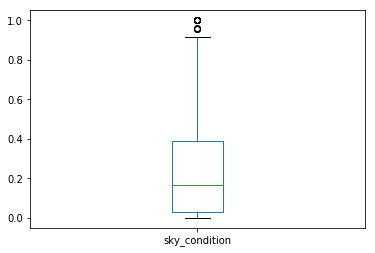

In [49]:
# From previous steps
is_sky_clear = df_clean['sky_condition'] == 'CLR'
resampled = is_sky_clear.resample('D')
sunny_hours = resampled.sum()
total_hours = resampled.count()
sunny_fraction = sunny_hours / total_hours

# Make a box plot of sunny_fraction
sunny_fraction.plot(kind='box')
plt.show()

Heat or humidity

Dew point is a measure of relative humidity based on pressure and temperature. A dew point above 65 is considered uncomfortable while a temperature above 90 is also considered uncomfortable.

In this exercise, you will explore the maximum temperature and dew point of each month. The columns of interest are 'dew_point_faren' and 'dry_bulb_faren'. After resampling them appropriately to get the maximum temperature and dew point in each month, generate a histogram of these values as subplots. Uncomfortably, you will notice that the maximum dew point is above 65 every month!

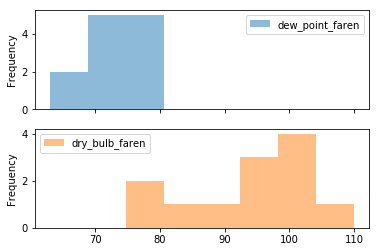

In [50]:
# Resample dew_point_faren and dry_bulb_faren by Month, aggregating the maximum values: monthly_max
monthly_max = df_clean[['dew_point_faren', 'dry_bulb_faren']].resample('M').max()

# Generate a histogram with bins=8, alpha=0.5, subplots=True
monthly_max.plot(kind = 'hist', bins = 8, alpha = 0.5, subplots=True)

# Show the plot
plt.show()

Probability of high temperatures

We already know that 2011 was hotter than the climate normals for the previous thirty years. In this final exercise, you will compare the maximum temperature in August 2011 against that of the August 2010 climate normals. More specifically, you will use a CDF plot to determine the probability of the 2011 daily maximum temperature in August being above the 2010 climate normal value. To do this, you will leverage the data manipulation, filtering, resampling, and visualization skills you have acquired throughout this course.



95.3


/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


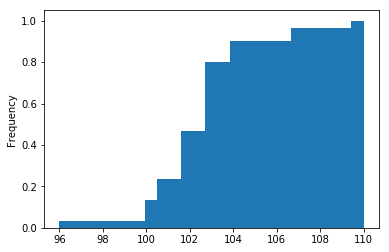

In [51]:
# Extract the maximum temperature in August 2010 from df_climate: august_max
august_max = df_climate.loc['2010-08', 'Temperature'].max()
print(august_max)

# Resample August 2011 temps in df_clean by day & aggregate the max value: august_2011
august_2011 = df_clean.loc['2011-08', 'dry_bulb_faren'].resample('D').max()


# Filter for days in august_2011 where the value exceeds august_max: august_2011_high

august_2011_high = august_2011[august_2011 > august_max]

# Construct a CDF of august_2011_high
august_2011_high.plot(kind = 'hist', normed = True, cumulative = True, bins = 25)

# Display the plot
plt.show()